In [3]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle 
from os import path

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve, auc

from keras.layers import Dense, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model
from keras.models import Model

from keras.utils.vis_utils import plot_model

In [4]:
# TRAIN_DATA_PATH = '/home/dmacs/Desktop/Sem2/206-Mini/KDD_data/kdd_train_1M.csv'
TRAIN_DATA_PATH = 'FILL HERE'
COLUMN_NAMES_PATH = '/home/dmacs/Desktop/Sem2/206-Mini/KDD_data/column_names.txt'
TEST_DATA_PATH = '/home/dmacs/Desktop/Sem2/206-Mini/KDD_data/kdd_test.csv'
PROD_DATA_PATH = '/home/dmacs/Desktop/Sem2/206-Mini/KDD_data/kdd_prod.csv'

In [5]:
df = pd.read_csv(TRAIN_DATA_PATH, header=None)

with open(COLUMN_NAMES_PATH, 'r') as txt_file:
    col_names = txt_file.readlines()
col_names

col_names_cleaned = [i.split(':')[0] for i in col_names]
# adding an extra column for the indicator
# col_names_cleaned.extend(['label'])

df.shape

(125973, 43)

In [6]:
df.columns = col_names_cleaned
df.drop(['difficulty_level'],axis=1,inplace=True)
df['label'].value_counts()


normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [7]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [8]:
def change_label(df):
    df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
            'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
    df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(df)
df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [9]:
df.label.value_counts()


normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [10]:
# selecting numeric attributes columns from data
numeric_col = df.select_dtypes(include='number').columns

std_scaler = StandardScaler()
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df


df = normalization(df.copy(),numeric_col)
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [11]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']
categorical = df[cat_col]
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
multi_data = df.copy()
multi_label = pd.DataFrame(multi_data.label)

# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,4
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,4
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,4
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos,0
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,4
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal,4
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos,0


In [13]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,0,0,0,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos


In [14]:
multi_data.label.value_counts()


normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

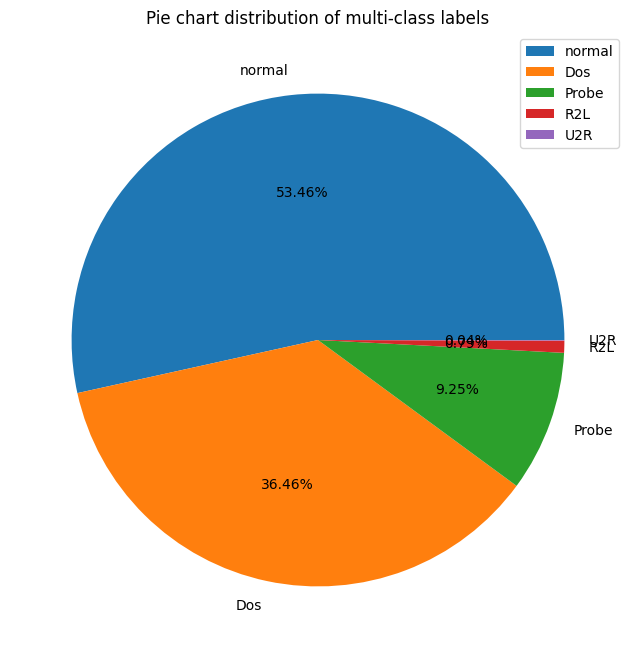

In [15]:
label_counts = multi_data.label.value_counts()

# Get the labels and counts in the correct order
labels = label_counts.index
counts = label_counts.values


# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels,autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
# plt.savefig('plots/Pie_chart_multi.png')
plt.show()

In [16]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col].copy()  # Use .copy() to create a copy of the DataFrame
numeric_multi.loc[:, 'intrusion'] = multi_data['intrusion']  # Use .loc to set values


In [17]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [18]:
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate','srv_count','dst_host_count']]

In [19]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [20]:
multi_data.shape

(125973, 102)

In [21]:
# saving final dataset to disk
multi_data.to_csv('/home/dmacs/Desktop/Sem2/206-Mini/KDD_data/multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,srv_count,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,-0.354343,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,-0.368110,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,-0.299273,...,0,0,0,0,1,0,0,0,0,Dos
3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,-0.313041,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0.058678,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,-0.037694,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,-0.354343,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,-0.368110,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,-0.271739,...,0,0,0,0,1,0,0,0,0,Dos


In [22]:
X = multi_data.iloc[:,0:91]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [24]:
import tensorflow as tf
constraints = tf.keras.constraints.UnitNorm(axis=0)

initializer = tf.keras.initializers.GlorotUniform(35)

model = tf.keras.Sequential([
        Dense(32, input_dim=X_train.shape[1], kernel_initializer=initializer, bias_initializer="zeros", kernel_constraint=constraints, activation='relu'),
        Dense(64, input_dim=X_train.shape[1], kernel_initializer=initializer, bias_initializer="zeros", kernel_constraint=constraints,activation='relu'),
        Dropout(0.3),
        Dense(128, input_dim=X_train.shape[1], kernel_initializer=initializer, bias_initializer="zeros", kernel_constraint=constraints,activation='relu'),
        Dense(y_train.shape[1],activation='softmax')
        ])


In [25]:
# model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2944      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 14,021
Trainable params: 14,021
Non-trainable params: 0
_________________________________________________________________


In [26]:
import datetime 
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

monitor = [
            tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=8, verbose=1, mode='auto',restore_best_weights=True),
            ]

history = model.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2,callbacks=[monitor],verbose=2)


2024-03-30 21:01:19.943690: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58692816 exceeds 10% of free system memory.


Epoch 1/100
17/17 - 6s - loss: 1.1866 - accuracy: 0.6703 - val_loss: 0.7381 - val_accuracy: 0.8750 - 6s/epoch - 369ms/step
Epoch 2/100
17/17 - 0s - loss: 0.5765 - accuracy: 0.8618 - val_loss: 0.3970 - val_accuracy: 0.8778 - 185ms/epoch - 11ms/step
Epoch 3/100
17/17 - 0s - loss: 0.3727 - accuracy: 0.8758 - val_loss: 0.3076 - val_accuracy: 0.8918 - 184ms/epoch - 11ms/step
Epoch 4/100
17/17 - 0s - loss: 0.2966 - accuracy: 0.9075 - val_loss: 0.2515 - val_accuracy: 0.9329 - 187ms/epoch - 11ms/step
Epoch 5/100
17/17 - 0s - loss: 0.2437 - accuracy: 0.9295 - val_loss: 0.2024 - val_accuracy: 0.9459 - 185ms/epoch - 11ms/step
Epoch 6/100
17/17 - 0s - loss: 0.2007 - accuracy: 0.9417 - val_loss: 0.1682 - val_accuracy: 0.9525 - 183ms/epoch - 11ms/step
Epoch 7/100
17/17 - 0s - loss: 0.1711 - accuracy: 0.9492 - val_loss: 0.1458 - val_accuracy: 0.9575 - 185ms/epoch - 11ms/step
Epoch 8/100
17/17 - 0s - loss: 0.1505 - accuracy: 0.9550 - val_loss: 0.1309 - val_accuracy: 0.9585 - 184ms/epoch - 11ms/step
Ep

In [27]:
filepath = '/home/dmacs/Desktop/Sem2/206-Mini/KDD_data/MLP_multi.json'
weightspath = '/home/dmacs/Desktop/Sem2/206-Mini/KDD_data/mlp_multi.h5'
if (not path.isfile(filepath)):
    # serialize model to JSON
    model_json = model.to_json()
    with open(filepath, "w") as json_file:
        json_file.write(model_json)

    # serialize weights to HDF5
    model.save_weights(weightspath)
    print("Saved model to disk")
    
    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)

    # load weights into new model
    model.load_weights(weightspath)
    print("Loaded model from disk")
# else:
#     print("sairammmmmmm")

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

788/788 [==============================] - 1s 1ms/step - loss: 0.0547 - accuracy: 0.9822
Test results - Loss: 0.054741598665714264 - Accuracy: 98.22186827659607%


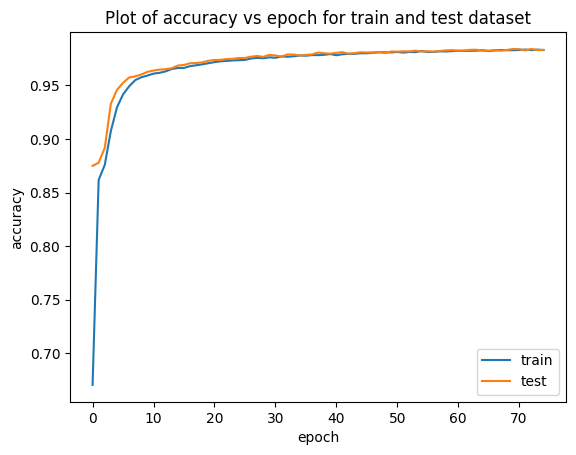

In [29]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('plots/mlp_multi_accuracy.png')
plt.show()

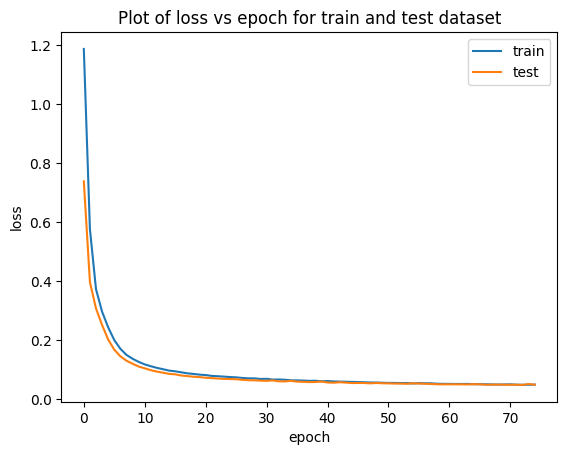

In [30]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('plots/mlp_multi_loss.png')
plt.show()

In [31]:
y_pred = model.predict(X_test)
fpr_model = dict()
tpr_model = dict()
roc_auc_model = dict()
for i in range(5):#5 classes are present
    fpr_model[i], tpr_model[i], _ = roc_curve(y_test.iloc[:, i], y_pred[:, i])
    roc_auc_model[i] = auc(fpr_model[i], tpr_model[i])

788/788 [==============================] - 1s 931us/step


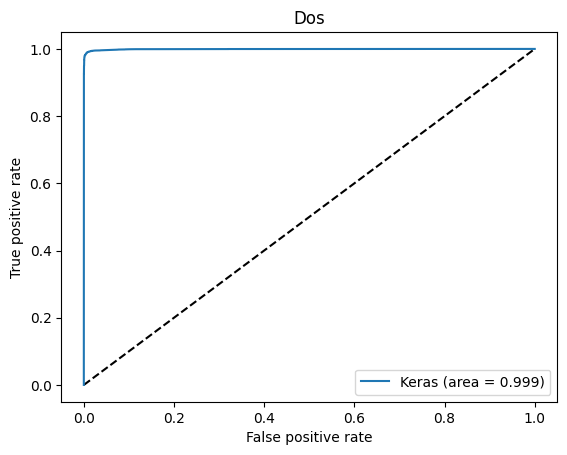

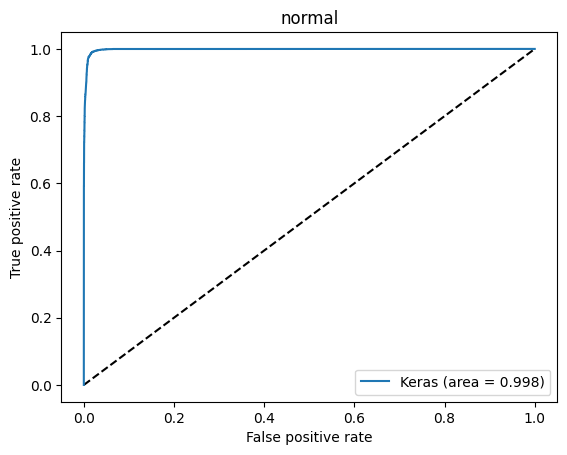

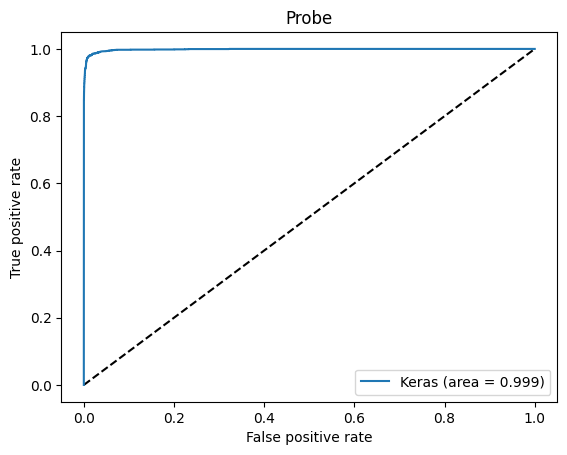

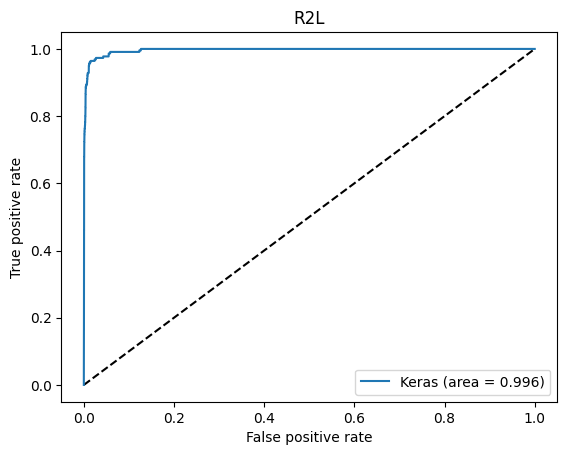

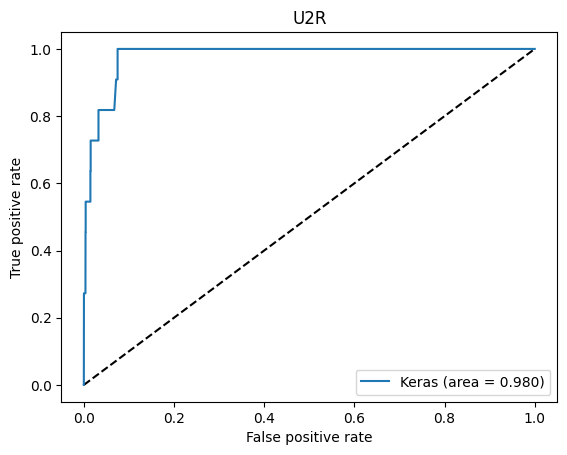

In [32]:
for i in range(5):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_model[i], tpr_model[i], label='Keras (area = {:.3f})'.format(roc_auc_model[i]))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(Y.columns[i])
    plt.legend(loc='best')
    # plt.savefig('plots/mlp_multi_roc'+str(i)+'.png')  
    plt.show()

In [33]:
pred = model.predict(X_test)

#(pred[i][j]) is rounded to the nearest integer. Converting the probabilities to binary predictions (0 or 1) for each class.
# Taking a threshold of 0.5.
for j in range(0,pred.shape[1]):
    for i in range(0,pred.shape[0]):
        pred[i][j] = int(round(pred[i][j]))

pred_df = pd.DataFrame(pred,columns=y_test.columns)


print("Recall Score - ",recall_score(y_test,pred_df.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,pred_df.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,pred_df.astype('uint8'),average='micro'))

788/788 [==============================] - 1s 981us/step
Recall Score -  0.9818217900377059
F1 Score -  0.9823481524134782
Precision Score -  0.9828750794659885


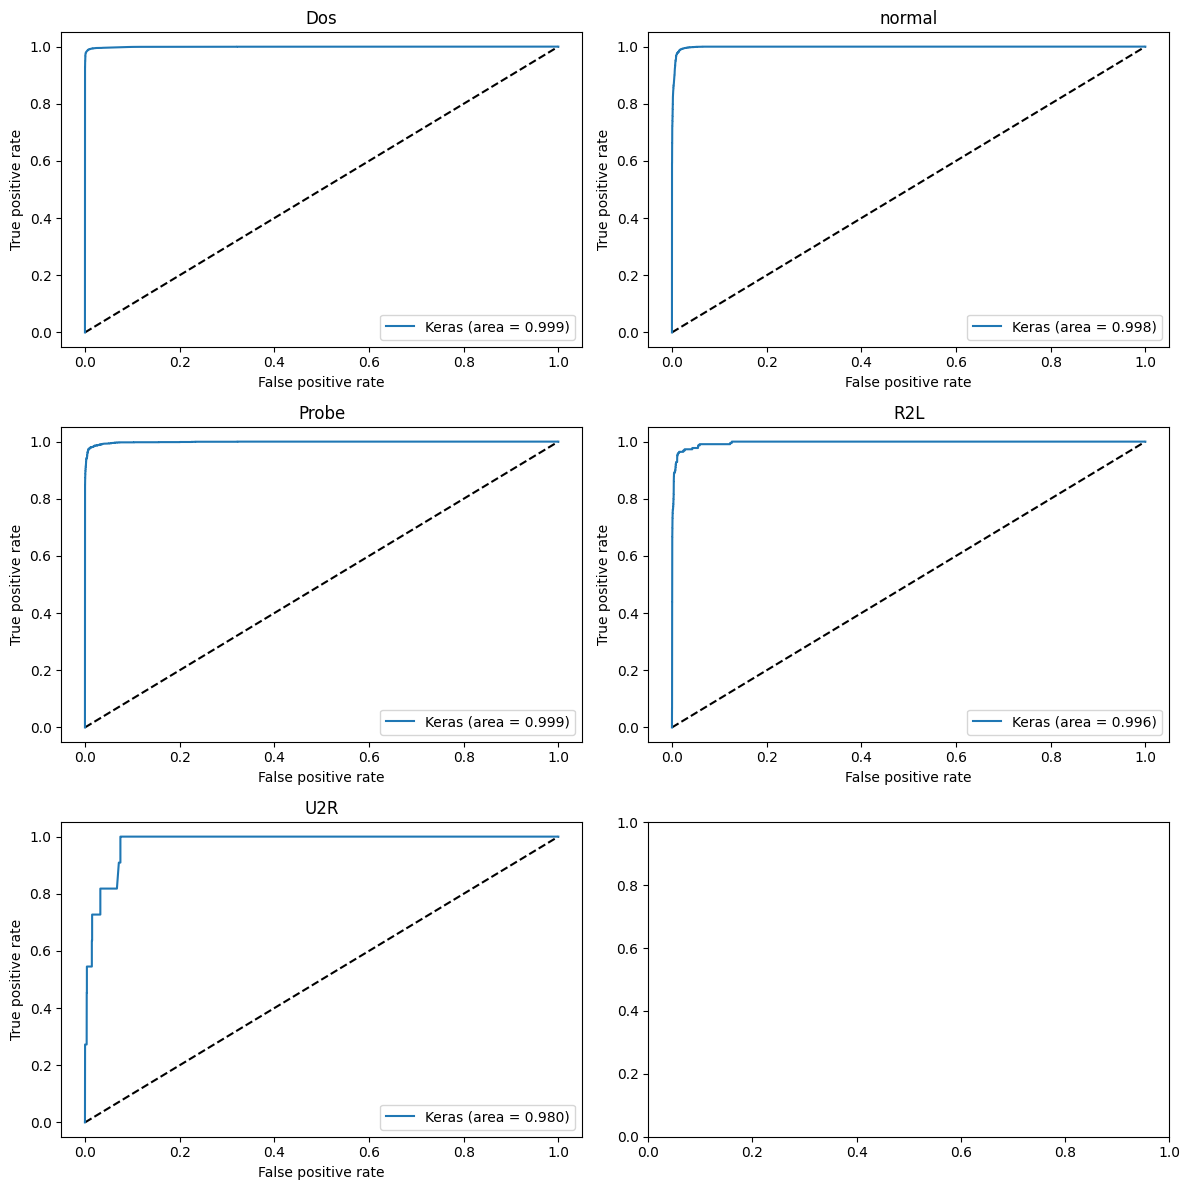

In [37]:

fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # Creating a 3x2 grid for plots
axes = axes.flatten()  # Flatten the axes array to iterate easily

for i, ax in enumerate(axes):
    if i < 5:  # Ensure that we don't exceed the number of plots
        ax.plot([0, 1], [0, 1], 'k--')
        ax.plot(fpr_model[i], tpr_model[i], label='Keras (area = {:.3f})'.format(roc_auc_model[i]))
        ax.set_xlabel('False positive rate')
        ax.set_ylabel('True positive rate')
        ax.set_title(Y.columns[i])
        ax.legend(loc='best')

plt.tight_layout()
plt.savefig('/home/dmacs/Desktop/Sem2/206-Mini/NSL-KDD-Multi.png')


<Figure size 640x480 with 0 Axes>